In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
CHECKERBOARD = (8, 11)  # Adjust to match your checkerboard dimensions


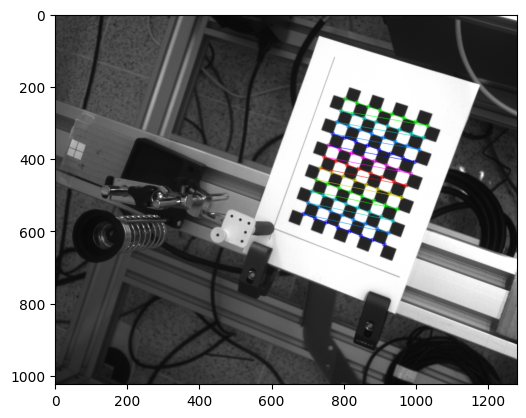

In [33]:
objp = np.zeros((CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:CHECKERBOARD[1], 0:CHECKERBOARD[0]].T.reshape(-1, 2)

# Arrays to store object points and image points
objpoints = []  # 3D points in the real world
imgpoints = []  # 2D points in the image plane

# Load checkerboard images
images = ['./images/image00.tiff']  # Replace with your image paths

fname = images[0]
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the checkerboard corners
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, None)

if ret:
    objpoints.append(objp)
    imgpoints.append(corners)

    # Optionally draw and display corners
    cv2.drawChessboardCorners(img, CHECKERBOARD, corners, ret)
    #cv2.imshow('Corners', img)
    #cv2.waitKey(500)

#cv2.destroyAllWindows()

plt.imshow(img)

In [82]:
# Sub pixel:
corners = corners.reshape((corners.shape[0], 2))
#print(corners[-1,:])
#criteria = (cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 100, 0.001) # tuple for specifying the termination criteria of the iterative refinement procedure cornerSubPix()
#cv2.cornerSubPix(gray,corners,(5,5),(-1,-1),criteria)
#corners[-1,:]

In [83]:
# Camera calibration

ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [84]:
R = cv2.Rodrigues(rvecs[0])[0]
t = tvecs[0]
Rt = np.concatenate([R,t], axis=-1) # [R|t]
P = np.matmul(camera_matrix,Rt) # A[R|t]

In [87]:
P

array([[ 1.80223462e+03,  7.30144323e+03,  2.03948268e+04,
         1.90884991e+05],
       [-4.25853771e+02, -7.83154133e+03,  2.84265680e+03,
         1.21445792e+05],
       [ 9.91488026e-01, -1.23805286e-01, -4.02957133e-02,
         2.44566872e+02]])

In [85]:
_W = 55
_H = 44
_D = 11

points_3d = [
    [0, 0, 0],
    [_W, 0, 0],
    [0, _H, 0],
    [0, 0, _D],
    [0, _H, _D],
    [_W, 0, _D],
    [_W, _H, 0],
    [_W, _H, _D]
]
points_3d = np.array(points_3d)
points_3d = np.hstack((points_3d, np.ones((len(points_3d), 1)))).T

proj = P @ points_3d

points_3d_px = ((proj/proj[2])[:2]).T

In [86]:
points_3d_px

array([[ 780.50223967,  496.57499111],
       [ 969.60596154,  327.73071392],
       [2141.81036241, -933.1822899 ],
       [1700.89271699,  625.56428415],
       [3085.73552434, -803.90425211],
       [1722.22195146,  432.91711259],
       [2081.62346749, -839.64892887],
       [2849.90318197, -734.27306927]])

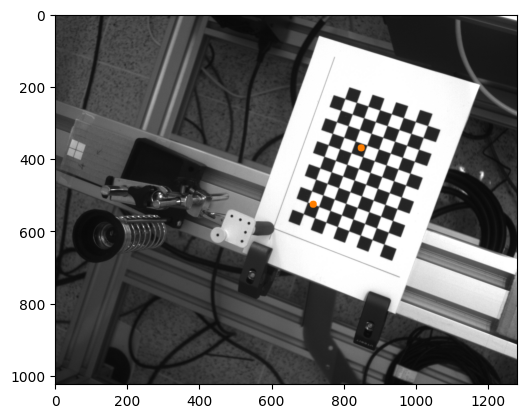

In [81]:
img = cv2.imread(fname)


for p in points_3d_px:
    cv2.circle(img, np.int32(p), radius=10, color=(255,127,0), thickness=-1)

plt.imshow(img)